Data Cleaning
Missing value imputation by mean, median
----------------------------------------------------
Methods to handle missing values
1. Ignore missing values row / delete row
2. fill missing value manually
3. global constant
4. measure of central tendency ( mean, midian & mode)
5. most probable value (ML Algorithms)
-----------------------------------------------------

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('ad_click_dataset.csv')

In [3]:
df.shape

(10000, 9)

In [4]:
df.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [5]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [6]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100
missing_value_per

id                   0.00
full_name            0.00
age                 47.66
gender              46.93
device_type         20.00
ad_position         20.00
browsing_history    47.82
time_of_day         20.00
click                0.00
dtype: float64

To print all missing rows

In [25]:
df[df.isnull().any(axis = 1)]

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.000000,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,40.197363,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.000000,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.000000,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.000000,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9994,7438,User7438,40.197363,Non-Binary,NaN,NaN,News,Morning,1
9995,8510,User8510,40.197363,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,40.197363,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,40.197363,Male,Mobile,Side,NaN,Morning,0


how to get all missing values columns

In [8]:
missing_num_var = [var for var in df.columns if df[var].isnull().sum()>0]
missing_num_var

['age',
 'gender',
 'device_type',
 'ad_position',
 'browsing_history',
 'time_of_day']

Mean()
---------
## it works only on numeric type columns, mean and median are not valid for categorical or textual data.

In [9]:
df2 = df.select_dtypes(include = ['int64','float64'])

In [10]:
df2.head()

,id,age,click
0,670,22.0,1
1,3044,NaN,1
2,5912,41.0,1
3,5418,34.0,1
4,9452,39.0,0


In [11]:
df2.isnull().sum()

id          0
age      4766
click       0
dtype: int64

In [12]:
missing_num_var = [var for var in df2.columns if df2[var].isnull().sum() > 0]
missing_num_var

['age']

In [13]:
df3_num_mean = df2.fillna(df2.mean())
df3_num_mean.isnull().sum()

id       0
age      0
click    0
dtype: int64

## Then how to fill value in non numeric type columns?

In [14]:
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\91965\AppData\Local\Temp\ipykernel_14112\1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


# 1. Using Mode for Object Data:
# The mode is the most frequent value in the column. This is the most common way to fill missing values for object data types (categorical or string data).

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91965\AppData\Local\Temp\ipykernel_14112\339505616.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[var], bins = 20, kde_kws = {'linewidth':8, 'color':'red'}, label = 'Original')
C:\Users\91965\AppData\Local\Temp\ipykernel_14112\339505616.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn

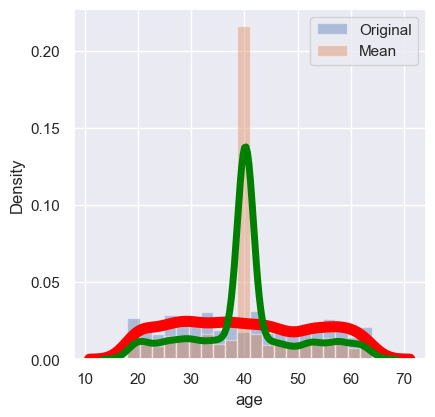

In [16]:
plt.figure(figsize = (10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df2[var], bins = 20, kde_kws = {'linewidth':8, 'color':'red'}, label = 'Original')
    sns.distplot(df3_num_mean[var], bins = 20, kde_kws = {'linewidth':5, 'color':'green'}, label = 'Mean')
    plt.legend()

In [17]:
df3_num_mean.shape

(10000, 3)

Median
--------

In [18]:
df3_num_median = df2.fillna(df2.median())
df3_num_median.isnull().sum()

id       0
age      0
click    0
dtype: int64

C:\Users\91965\AppData\Local\Temp\ipykernel_14112\717014604.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[var], bins = 20, hist=False, kde_kws = {'linewidth':8, 'color':'red'}, label = 'Original')
C:\Users\91965\AppData\Local\Temp\ipykernel_14112\717014604.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

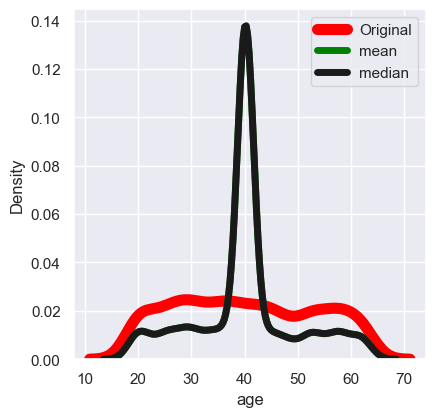

In [19]:
plt.figure(figsize = (10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df2[var], bins = 20, hist=False, kde_kws = {'linewidth':8, 'color':'red'}, label = 'Original')
    sns.distplot(df3_num_mean[var], bins = 20, hist = False, kde_kws = {'linewidth':5, 'color':'green'}, label = 'mean')
    sns.distplot(df3_num_mean[var], bins = 20, hist = False, kde_kws = {'linewidth':5, 'color':'k'}, label = 'median')
    plt.legend()

In [20]:
df['age'].fillna(df['age'].mean(), inplace=True)

C:\Users\91965\AppData\Local\Temp\ipykernel_14112\1503503937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [21]:
df.shape

(10000, 9)

In [1]:
df.head(5)

NameError: name 'df' is not defined